## Name: Abhishek Kumar Pandey
## MU Reg No: 20250154

## **NCG613 Assignment-1**

Using the python code snippets in this example, put together Python code that applies a cross-validated \(k\)-nearest neighbour model from the house price data, and produces the following:

•	A 3-D plot of the house price for average floor area.

•	A 3-D plot of the house price for floor areas of 75 square metres.

•	A 3-D plot of the house price for floor areas of 125 square meters.

Use each of these in a short (1,000 word) report outlining the technique and describing the results. Use the Jupyter notepad format for this to make the report. 

## Introduction

The Assignment/Project is based on house price prediction (<b>Regression</b>) which is a supervised learning method. In this, we are focusing on applying cross-validated KNN (K-Nearest Neighbour) algorithm using GridSearchCV package from sklearn library to get the optimum value of the <b>k</b>. Also, we need to provide 3-D visualization of the house price for average floor area, plot of house price for the floor areas of 75 square metres and plot of the house price for floor areas of 125 square metres respectively.


## Importing required packages

In the beginning, we are only importing the basic packages which are required to read data in the Jupyter notebook and for further processing i.e; <b>numpy and pandas</b>. Also, we would be using seaborn library for plotting correlation heatmap and we would be majorly using the sklearn library to import <b>KNN algorithm</b> and then, use <b>GridSearchCV</b> for hyperparameter tuning.

In [1]:
import pandas as pd
import numpy as np

## Reading the Dataset

The pandas library function <b>read_csv</b> has been used to read the CSV file into the Jupyter Notebook. It returns a dataframe object and it has been stored it another variable called <b>df</b>.
From the output of the above dataframe, we can see that all the columns are numeric/continuous but there are some unwanted columns like <b>ID</b> which will be removed in the data preprocessing stage (point 1 mentioned in the next few lines).

<b>Response/Outcome variable:</b> price (House Price)

<b>Predictor/Explanatory variable:</b> east (Easting), north (Northing) and fl_area (Floor area)

Before we start getting into insights about the dataset, we need to define the stages in machine learning lifecycle.

1. Data Preprocessing.
2. Selecting the best algorithm w.r.t the dataset.
3. Hyperparameter tuning of the algorithm.
4. Accuracy Score of the algorithm.

In the next line, the dataset <b>"hpdemo.csv"</b> is being read as a DataFrame.

In [2]:
df=pd.read_csv('hpdemo.csv',index_col=False)
df

,ID,east,north,price,fl_area
0,1,523800,179700,107000,50
1,2,533200,170900,55500,66
2,3,514600,175800,103000,90
3,4,516000,171000,187000,125
4,5,533700,169200,43000,50
...,...,...,...,...,...
1400,1401,515600,173100,68500,44
1401,1402,513200,186500,58500,59
1402,1403,542900,189500,247000,185
1403,1404,524900,185300,153000,96


To get the data type of the columns, df.info() function is used.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ID       1405 non-null   int64
 1   east     1405 non-null   int64
 2   north    1405 non-null   int64
 3   price    1405 non-null   int64
 4   fl_area  1405 non-null   int64
dtypes: int64(5)
memory usage: 55.0 KB


## 1. Data preprocessing

In the data preprocessing stage, we would check for missing/NA values in dataset and drop unwanted columns from the dataset.
Also, we would be checking if the data is correlated with each other or not and whether the datasets needs to be  normalized/standardised.

### Checking for missing/NA values in dataset and dropping unwanted columns from the dataset

ID column is unwanted column as it doesn't signify anything w.r.t the house price. So, we can drop the ID column.

In [4]:
df.drop('ID', inplace=True, axis=1)

Also, we are checking for null/NA values present in the dataframe and found that there are no such values present. No data cleaning is required.

In [5]:
df.isna().sum()

east       0
north      0
price      0
fl_area    0
dtype: int64

Correlation heatmap has been generated using seaborn library. From the below heatmap, we can see that the variable <b>fl_area</b> and <b>price</b> is highly positively correlated with each other with a values of <b>0.7</b>. 

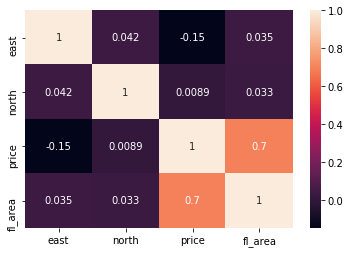

In [61]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

Also, we can use the <b> describe()</b> function to see the summary of statistics related to the DataFrame.
Referring the below output table, the mean value of all the columns differs with each other with a large magnitude, hence, standardisation of columns is required. Here, we are using StandardScaler() function to standarise the values from sklearn.preprocessing library. It internally use z-scores to scale the values to mean=0 and variance=1.


In [7]:
df.describe()

,east,north,price,fl_area
count,1405.000000,1405.000000,1405.000000,1405.000000
mean,528889.537367,179731.743772,120668.330961,92.878292
std,11041.860785,8602.914112,76547.092469,36.817891
min,505100.000000,158500.000000,32500.000000,25.000000
25%,521600.000000,173000.000000,73750.000000,68.000000
50%,528600.000000,179900.000000,100000.000000,87.000000
75%,536600.000000,186800.000000,140000.000000,108.000000
max,555700.000000,199800.000000,850000.000000,269.000000


In [8]:
from sklearn.preprocessing import StandardScaler
scaler_x= StandardScaler()

In [9]:
scaler_x.fit(df[['east','north','fl_area']])
X=scaler_x.transform(df[['east','north','fl_area']])
y=df['price']

Now, we can see from the below output that the values are now standardised and are in same scale.

In [11]:
pd.DataFrame(X,columns={'east','north','fl_area'}).describe()

,east,north,fl_area
count,1.405000e+03,1.405000e+03,1.405000e+03
mean,-4.046506e-15,8.698459e-16,-3.982579e-17
std,1.000356e+00,1.000356e+00,1.000356e+00
min,-2.155253e+00,-2.468850e+00,-1.844279e+00
25%,-6.604080e-01,-7.827744e-01,-6.759526e-01
50%,-2.623113e-02,1.956501e-02,-1.597154e-01
75%,6.985424e-01,8.219044e-01,4.108625e-01
max,2.428939e+00,2.333558e+00,4.785294e+00


To get the training and testing accuracy, we are splitting the dataset into train and test using sklearn.model_selection library. Here, we are splitting the dataset into 80% for training and 20% for testing.

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

## 2. Selecting the best algorithm

Since house prices are usually determined by brokers, sellers, or buyers based on the prices of neighboring homes, the K-nearest neighbor model is used in this case. A supervised learning algorithm can be used to forecast house prices, and since house prices are continuous, a regression algorithm is used.

## 3. Hyperparameter tuning

One of the simplest methods for deciding the best tuning parameters is to iterate over all possible tuning parameter combinations, apply a cross validation process to each set of values, and choose the best match. Cross validation grid check is the term for this method. Cross-validation is a method that uses a training set, which is a subset of the whole data set.
The training set is a subset of the complete data set that is used to construct the model in cross-validation. Through comparing the model predictions to the rest of the results, known as the test set, the best model parameters are found.
Since it computes two cross validation scores, one with the initial training and test dataset and the other by switching the training and test datasets, cross validation grid quest is symmetrical.


From the best optimizer output (Code: KNN_optimizer.best_estimator_), we can see that the KNN algorithm best fits in <b>n-neighbour=20, leaf_size=30,
metric='minkowski' and p=1.</b>

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
KNN_optimizer=GridSearchCV(estimator=KNeighborsRegressor(),
                          param_grid={'n_neighbors':range(1,50),
                                      'weights':['uniform','distance'],
                                      'p':[1,2]})

In [32]:
KNN_optimizer.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50), 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [33]:
KNN_optimizer.best_estimator_

KNeighborsRegressor(n_neighbors=20, p=1, weights='distance')

In [34]:
y_pred=KNN_optimizer.predict(X_test)

In [44]:
KNN_optimizer.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 20,
 'p': 1,
 'weights': 'distance'}

### 4. Accuracy Score of the algorithm

In supervised regression model, most common evaluation metrics are mentioned below:

<b>R-squared:</b> It calculates of the proportion of variability in an outcome that can be explained by the predictor variables (R2). In multiple regression models, R2 is the squared ratio of observed outcome values to model-expected values. R-squared is a measure of how good a model is.

<b>Root Mean Squared Error (RMSE):</b> This metric measures the model's average error in estimating an observation's result. The square root of the mean squared error (MSE), which is the average squared deviation between the observed real outome values and the values expected by the formula, is the RMSE in mathematics. As a result, MSE = mean((observed_value - predicted_value)^2) and RMSE = sqrt((observed_value - predicted_value)^2).

<b>Mean Absolute Error (MAE):</b> Like the RMSE, the MAE measures the prediction error. Mathematically, it is the average absolute difference between observed and predicted outcomes, MAE = mean(abs(observed_value - predicted_value)). MAE is less sensitive to outliers compared to RMSE.

Here, mean absolute error, mean squared error and r2_score has been used for predicting the accuracy score of the model. These are present in sklearn.metrics package. R2 score for the test data seems to be approx <b>76.3% </b> which seems to be good.

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,y_pred)

23926.094169293723

In [36]:
mean_squared_error(y_test,y_pred)

1205505206.502721

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

print('R2 score for the KNN algorithm: ', r2_score(y_test, y_pred)*100,'%')

R2 score for the KNN algorithm:  76.32712741197012 %


Now, the algorithm has been trained. We can now proceed with the graphical visualization and predicting house prices based on the new/updated input features.

### 3-D Plotting of the data:

The 3-D plot is included in the matplotlib package called <b>mpl_toolkits.mplot3d</b>. In this, we import Axes3D to plot the 3-D representation of the below mentioned points in 1,2 and 3. 

1.	A 3-D plot of the house price for average floor area.

2.	A 3-D plot of the house price for floor areas of 75 square metres.

3.	A 3-D plot of the house price for floor areas of 125 square meters.

Here, we need to make a surface plot to generate a 3-D plot.
A surface plot illustrates a functional relationship between two independent variables and a specified dependent variable X,Y and Z. The contour plot has a companion plot called the plot. A surface plot is similar to a wireframe plot, except that each wireframe face is a filled polygon. This will help you understand the topology of the surface you're looking at. The plot surface() function takes three arguments: x, y, and z.

To generate a 3-D plot, we need to first convert the points to a rectangular grid out of an array of x values and an array of y values. Here, x and y represents the "east" and "north" column. Similarly, we need to order the values of average floor area/ floor areas of 75 square metres/ floor areas of 125 square metres into similar rectangular grid and then merge the columns in an single array. Then, we need to transform the merged grid using StandardScaler and then pass it for predicting the price of the house based on average floor area/ floor areas of 75 square metres/ floor areas of 125 square metres respectively.

Once done, we need to plot it using the surface plot by passing the scaled values.

### 1. A 3-D plot of the house price for average floor area.

In [45]:
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D

In [46]:
east_mesh=df['east'].sort_values(ascending=True)
east_mesh=east_mesh.ravel()

north_mesh=df['north'].sort_values(ascending=True)
north_mesh=north_mesh.ravel()

east_mesh,north_mesh=np.meshgrid(east_mesh,north_mesh)

fl_area_mesh=np.zeros_like(east_mesh)
fl_area_mesh=fl_area_mesh+np.mean(df['fl_area'])
fl_area_mesh

array([[92.87829181, 92.87829181, 92.87829181, ..., 92.87829181,
        92.87829181, 92.87829181],
       [92.87829181, 92.87829181, 92.87829181, ..., 92.87829181,
        92.87829181, 92.87829181],
       [92.87829181, 92.87829181, 92.87829181, ..., 92.87829181,
        92.87829181, 92.87829181],
       ...,
       [92.87829181, 92.87829181, 92.87829181, ..., 92.87829181,
        92.87829181, 92.87829181],
       [92.87829181, 92.87829181, 92.87829181, ..., 92.87829181,
        92.87829181, 92.87829181],
       [92.87829181, 92.87829181, 92.87829181, ..., 92.87829181,
        92.87829181, 92.87829181]])

In [47]:
grid_predictor_vars = np.array([east_mesh.ravel(),
    north_mesh.ravel(),fl_area_mesh.ravel()]).T 
grid_predictor_vars

array([[5.05100000e+05, 1.58500000e+05, 9.28782918e+01],
       [5.05200000e+05, 1.58500000e+05, 9.28782918e+01],
       [5.05300000e+05, 1.58500000e+05, 9.28782918e+01],
       ...,
       [5.55200000e+05, 1.99800000e+05, 9.28782918e+01],
       [5.55700000e+05, 1.99800000e+05, 9.28782918e+01],
       [5.55700000e+05, 1.99800000e+05, 9.28782918e+01]])

In [48]:
X=scaler_x.transform(grid_predictor_vars)

In [49]:
hp_pred=KNN_optimizer.predict(X)

In [50]:
hp_mesh = hp_pred.reshape(east_mesh.shape)
hp_mesh

array([[106185.7612065 , 106184.37992964, 106182.98854661, ...,
        109018.57783518, 109052.24381355, 109052.24381355],
       [106180.38674972, 106178.96594218, 106177.5345905 , ...,
        109104.56431819, 109135.20351335, 109135.20351335],
       [106163.30804589, 106161.7578979 , 106160.19573   , ...,
        109205.00605536, 109233.2876739 , 109233.2876739 ],
       ...,
       [108508.65572931, 108507.89399024, 108507.11117919, ...,
         85293.88039735,  85312.1507952 ,  85312.1507952 ],
       [108512.2578654 , 108511.59469183, 108510.91350435, ...,
         85336.52046858,  85352.6776667 ,  85352.6776667 ],
       [108517.48963756, 108516.96656398, 108516.42963773, ...,
         85364.52622679,  85378.25015456,  85378.25015456]])

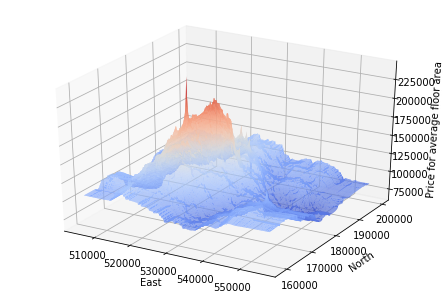

In [51]:
fig=pl.figure()
axes = Axes3D(fig)
axes.plot_surface(east_mesh,north_mesh,hp_mesh,rstride=1, cstride=1, cmap='coolwarm',lw=0.01)
axes.set_xlabel('East')
axes.set_ylabel('North')
axes.set_zlabel('Price for average floor area')
pl.show()

### 2. A 3-D plot of the house price for floor areas of 75 square metres.

In [52]:
east_mesh=df['east'].sort_values(ascending=True)
east_mesh=east_mesh.ravel()

north_mesh=df['north'].sort_values(ascending=True)
north_mesh=north_mesh.ravel()

east_mesh,north_mesh=np.meshgrid(east_mesh,north_mesh)

fl_area_mesh=np.zeros_like(east_mesh)
fl_area_mesh=fl_area_mesh+75
fl_area_mesh

array([[75, 75, 75, ..., 75, 75, 75],
       [75, 75, 75, ..., 75, 75, 75],
       [75, 75, 75, ..., 75, 75, 75],
       ...,
       [75, 75, 75, ..., 75, 75, 75],
       [75, 75, 75, ..., 75, 75, 75],
       [75, 75, 75, ..., 75, 75, 75]], dtype=int64)

In [53]:
grid_predictor_vars = np.array([east_mesh.ravel(),
    north_mesh.ravel(),fl_area_mesh.ravel()]).T 
grid_predictor_vars
X=scaler_x.transform(grid_predictor_vars)
hp_pred=KNN_optimizer.predict(X)
hp_mesh = hp_pred.reshape(east_mesh.shape)
hp_mesh

array([[89608.36631236, 89607.47174099, 89606.56953973, ...,
        89619.26852323, 89610.63562988, 89610.63562988],
       [89604.8795582 , 89603.9550721 , 89603.02257505, ...,
        89652.66435171, 89642.96350223, 89642.96350223],
       [89593.69137592, 89592.6677137 , 89591.63473542, ...,
        89545.32335891, 89537.64465876, 89537.64465876],
       ...,
       [87807.01775405, 87804.18613872, 87801.3321404 , ...,
        73989.59759525, 73972.64836105, 73972.64836105],
       [87821.21165584, 87818.49126672, 87815.74968781, ...,
        74010.57646005, 73993.41799848, 73993.41799848],
       [87844.73861145, 87842.19884622, 87839.63981517, ...,
        74044.66999999, 74027.25259715, 74027.25259715]])

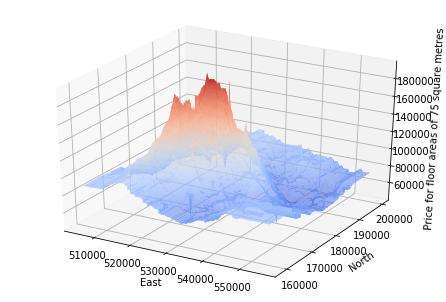

In [54]:
fig=pl.figure()
axes = Axes3D(fig)
axes.plot_surface(east_mesh,north_mesh,hp_mesh,rstride=1, cstride=1, cmap='coolwarm',lw=0.01)
axes.set_xlabel('East')
axes.set_ylabel('North')
axes.set_zlabel('Price for floor areas of 75 square metres')
pl.show()

### 3. A 3-D plot of the house price for floor areas of 125 square meters.

In [55]:
east_mesh=df['east'].sort_values(ascending=True)
east_mesh=east_mesh.ravel()

north_mesh=df['north'].sort_values(ascending=True)
north_mesh=north_mesh.ravel()

east_mesh,north_mesh=np.meshgrid(east_mesh,north_mesh)

fl_area_mesh=np.zeros_like(east_mesh)
fl_area_mesh=fl_area_mesh+125
fl_area_mesh

array([[125, 125, 125, ..., 125, 125, 125],
       [125, 125, 125, ..., 125, 125, 125],
       [125, 125, 125, ..., 125, 125, 125],
       ...,
       [125, 125, 125, ..., 125, 125, 125],
       [125, 125, 125, ..., 125, 125, 125],
       [125, 125, 125, ..., 125, 125, 125]], dtype=int64)

In [56]:
grid_predictor_vars = np.array([east_mesh.ravel(),
    north_mesh.ravel(),fl_area_mesh.ravel()]).T 
grid_predictor_vars
X=scaler_x.transform(grid_predictor_vars)
hp_pred=KNN_optimizer.predict(X)
hp_mesh = hp_pred.reshape(east_mesh.shape)
hp_mesh

array([[143576.40686696, 143576.16516942, 143575.92163437, ...,
        124045.71595159, 124079.10297321, 124079.10297321],
       [143575.4660514 , 143575.21715895, 143574.96634401, ...,
        124113.43236629, 124145.57404659, 124145.57404659],
       [143572.46919269, 143572.19661921, 143571.92183403, ...,
        124305.34938271, 124334.64543336, 124334.64543336],
       ...,
       [146963.52926258, 146959.65767327, 146955.76696973, ...,
        117221.45267424, 117237.85848   , 117237.85848   ],
       [146983.10363229, 146979.33073454, 146975.53856847, ...,
        117238.28605202, 117253.81018961, 117253.81018961],
       [147016.13789601, 147012.53771491, 147008.91841104, ...,
        117265.61107455, 117279.75353956, 117279.75353956]])

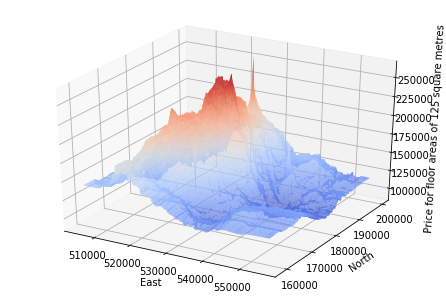

In [57]:
fig=pl.figure()
axes = Axes3D(fig)
axes.plot_surface(east_mesh,north_mesh,hp_mesh,rstride=1, cstride=1, cmap='coolwarm',lw=0.01)
axes.set_xlabel('East')
axes.set_ylabel('North')
axes.set_zlabel('Price for floor areas of 125 square metres')
pl.show()

### Interpretation of the above 3-D plots

The three 3D plots shown above forecast the house price for the specified values at each easting and northing spot. The darker color (shade of red) denotes a high-priced spot, while the lighter color(shade of blue) denotes a lower-priced town. The following are the conclusions drawn from the three plots above:

1. When you travel farther away in either direction from this central peaklocation, house prices decrease for all house sizes, although there is a small difference before the steady decrease in some suburban regions.

2. The peak price position for the three house size groups mentioned above is almost identical, roughly between 520000/530000 easting and 190000/200000 northing.

3. The price for the average floor area starts with 75000. Maximum price is 175000.
4. The prices start at 60000 for 75 square meters.The maximum house price for a 75 square meter home is around 150000.
5. The price range begins at 100000 for 125 square meters.  For a 125 square meter floor space, the maximum house price is around 250000 pounds.




### Conclusion

From the above analysis,we can see that the starting and peak price of the house changes with the change in the fl_area. Also, it has been seen from the correlation heatmap that the <b>fl_area and price</b> columns are highly correlated with each other.
The variation in the three 3-D plot shows some dependency with other factors apart from easting, northing and floor area which is not included in the analysis. 